In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import os 
from six.moves import urllib
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import mysql.connector as connection


In [2]:
download_dir="./data/"
os.makedirs(download_dir ,exist_ok=True)
download_url="https://raw.githubusercontent.com/mohitmahiyt/CarPricePredictionDataset/main/cars_dataset.csv"
filename=os.path.basename(download_url)
print(filename)

download_file_path=os.path.join(download_dir,filename)
print(download_file_path)

urllib.request.urlretrieve(download_url,download_file_path)

cars_dataset.csv
./data/cars_dataset.csv


('./data/cars_dataset.csv', <http.client.HTTPMessage at 0x1c55f325160>)

In [3]:
df = pd.read_csv(r"./data/cars_dataset.csv")
df

,Unnamed: 0,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,1,Maruti Alto,Maruti,Alto,9,53800,Dealer,CNG,Manual,26.83,796,38.4,5,235000
1,2,Maruti Alto,Maruti,Alto,11,11000,Dealer,CNG,Manual,26.83,796,38.4,5,185000
2,3,Maruti Alto,Maruti,Alto,11,80000,Dealer,CNG,Manual,26.83,796,38.4,5,150000
3,4,Maruti Alto,Maruti,Alto,10,57000,Dealer,CNG,Manual,26.83,796,38.4,5,172000
4,5,Maruti Alto,Maruti,Alto,11,72000,Individual,CNG,Manual,26.83,796,38.4,5,125000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15406,30016,Bentley Continental,Bentley,Continental,10,30000,Dealer,Petrol,Automatic,8.60,5998,552.0,4,8100000
15407,30017,Rolls-Royce Ghost,Rolls-Royce,Ghost,4,5000,Individual,Petrol,Automatic,10.20,6592,563.0,4,24200000
15408,30018,Bentley Continental,Bentley,Continental,9,37500,Dealer,Petrol,Automatic,6.00,5998,600.0,5,5200000
15409,30019,Ferrari GTC4Lusso,Ferrari,GTC4Lusso,2,3800,Dealer,Petrol,Automatic,4.00,3855,601.0,4,39500000


In [4]:
df.drop(columns=['Unnamed: 0'], inplace=True)
df

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,53800,Dealer,CNG,Manual,26.83,796,38.4,5,235000
1,Maruti Alto,Maruti,Alto,11,11000,Dealer,CNG,Manual,26.83,796,38.4,5,185000
2,Maruti Alto,Maruti,Alto,11,80000,Dealer,CNG,Manual,26.83,796,38.4,5,150000
3,Maruti Alto,Maruti,Alto,10,57000,Dealer,CNG,Manual,26.83,796,38.4,5,172000
4,Maruti Alto,Maruti,Alto,11,72000,Individual,CNG,Manual,26.83,796,38.4,5,125000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15406,Bentley Continental,Bentley,Continental,10,30000,Dealer,Petrol,Automatic,8.60,5998,552.0,4,8100000
15407,Rolls-Royce Ghost,Rolls-Royce,Ghost,4,5000,Individual,Petrol,Automatic,10.20,6592,563.0,4,24200000
15408,Bentley Continental,Bentley,Continental,9,37500,Dealer,Petrol,Automatic,6.00,5998,600.0,5,5200000
15409,Ferrari GTC4Lusso,Ferrari,GTC4Lusso,2,3800,Dealer,Petrol,Automatic,4.00,3855,601.0,4,39500000


In [5]:
try:
    conn=connection.connect(password='Karunesh@1311',user='root')
    query="create database if not exists car_database;"
    cursor = conn.cursor()
    cursor.execute(query)
    conn.commit()
except Exception as e:
    print(e)
else:
    print('connected')
    print("database created successfully")
finally:
    conn.close()


connected
database created successfully


In [6]:
try:
     conn=connection.connect(password='Karunesh@1311',user='root',database="car_database")
     query="""create table if not exists car_dataset(
     car_name varchar(30),
     brand varchar(30),
     model varchar(30),
     vehicle_age int,
     km_driven int,
     seller_type varchar(30),
     fuel_type varchar(30),
     transmission_type varchar(30),
     mileage float,
     engine int,
     max_power float,
     seats int,
     selling_price bigint);"""

     cursor = conn.cursor()
     cursor.execute(query)
     conn.commit()
except Exception as e:
    print(e)
else:
    print('connected')
    print("table created successfully")
finally:
    conn.close()
       

connected
table created successfully


In [7]:
try:
    conn = connection.connect(user='root', password='Karunesh@1311', database="car_database")
    query="""truncate car_dataset;"""
    cursor = conn.cursor()
    cursor.execute(query)
    conn.commit()

    query = f"""truncate car_dataset;"""
    cursor = conn.cursor()
    cursor.execute(query)        
    conn.commit()
    for key, value in df.iterrows():
        car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price = value[0],value[1], value[2], value[3], value[4],value[5] ,value[6],value[7] ,value[8] ,value[9] ,value[10] ,value[11] ,value[12] 
        
        query = f"""insert into car_dataset values ('{car_name}','{brand}', '{model}',{vehicle_age},{km_driven},'{seller_type}','{fuel_type}','{transmission_type}',{mileage},{engine},{max_power},{seats},{selling_price});"""
        cursor = conn.cursor()
        cursor.execute(query)
        conn.commit()

except Exception as e:
    print(e)
else:
    print('connected')
    print("table created successfully")
finally:
    conn.close()

connected
table created successfully


In [8]:
df.describe(include='object')

,car_name,brand,model,seller_type,fuel_type,transmission_type
count,15411,15411,15411,15411,15411,15411
unique,121,32,120,3,5,2
top,Hyundai i20,Maruti,i20,Dealer,Petrol,Manual
freq,906,4992,906,9539,7643,12225


In [9]:
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print(f"there are {len(numerical_features)} numerical features named: {numerical_features}")
print(f"there are {len(categorical_features)} categorical_features named: {categorical_features}")

there are 7 numerical features named: ['vehicle_age', 'km_driven', 'mileage', 'engine', 'max_power', 'seats', 'selling_price']
there are 6 categorical_features named: ['car_name', 'brand', 'model', 'seller_type', 'fuel_type', 'transmission_type']


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15411 entries, 0 to 15410
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   car_name           15411 non-null  object 
 1   brand              15411 non-null  object 
 2   model              15411 non-null  object 
 3   vehicle_age        15411 non-null  int64  
 4   km_driven          15411 non-null  int64  
 5   seller_type        15411 non-null  object 
 6   fuel_type          15411 non-null  object 
 7   transmission_type  15411 non-null  object 
 8   mileage            15411 non-null  float64
 9   engine             15411 non-null  int64  
 10  max_power          15411 non-null  float64
 11  seats              15411 non-null  int64  
 12  selling_price      15411 non-null  int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 1.5+ MB


In [11]:
for col in categorical_features:
     print(df[col].value_counts(normalize=True))

car_name
Hyundai i20              0.058789
Maruti Swift Dzire       0.057751
Maruti Swift             0.050678
Maruti Alto              0.050483
Honda City               0.049121
                           ...   
Maserati Quattroporte    0.000065
Maserati Ghibli          0.000065
Mercedes-AMG C           0.000065
Rolls-Royce Ghost        0.000065
Ferrari GTC4Lusso        0.000065
Name: proportion, Length: 121, dtype: float64
brand
Maruti           0.323924
Hyundai          0.193498
Honda            0.096360
Mahindra         0.065602
Toyota           0.051457
Ford             0.051262
Volkswagen       0.040231
Renault          0.034780
BMW              0.028486
Tata             0.027902
Mercedes-Benz    0.021867
Skoda            0.021673
Audi             0.012459
Datsun           0.011031
Jaguar           0.003828
Land Rover       0.003309
Jeep             0.002660
Kia              0.002076
Porsche          0.001363
Volvo            0.001298
MG               0.001233
Mini             0.

In [12]:
# top 5 datasets
df.head()


,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,53800,Dealer,CNG,Manual,26.83,796,38.4,5,235000
1,Maruti Alto,Maruti,Alto,11,11000,Dealer,CNG,Manual,26.83,796,38.4,5,185000
2,Maruti Alto,Maruti,Alto,11,80000,Dealer,CNG,Manual,26.83,796,38.4,5,150000
3,Maruti Alto,Maruti,Alto,10,57000,Dealer,CNG,Manual,26.83,796,38.4,5,172000
4,Maruti Alto,Maruti,Alto,11,72000,Individual,CNG,Manual,26.83,796,38.4,5,125000


In [13]:
df.sample()

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
4527,Mahindra KUV,Mahindra,KUV,5,87500,Individual,Diesel,Manual,25.32,1198,77.0,6,350000


In [14]:
# bottom 5 datasets
df.tail()

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
15406,Bentley Continental,Bentley,Continental,10,30000,Dealer,Petrol,Automatic,8.6,5998,552.0,4,8100000
15407,Rolls-Royce Ghost,Rolls-Royce,Ghost,4,5000,Individual,Petrol,Automatic,10.2,6592,563.0,4,24200000
15408,Bentley Continental,Bentley,Continental,9,37500,Dealer,Petrol,Automatic,6.0,5998,600.0,5,5200000
15409,Ferrari GTC4Lusso,Ferrari,GTC4Lusso,2,3800,Dealer,Petrol,Automatic,4.0,3855,601.0,4,39500000
15410,Bentley Continental,Bentley,Continental,9,9000,Dealer,Petrol,Automatic,9.5,5998,626.0,4,14500000


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15411 entries, 0 to 15410
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   car_name           15411 non-null  object 
 1   brand              15411 non-null  object 
 2   model              15411 non-null  object 
 3   vehicle_age        15411 non-null  int64  
 4   km_driven          15411 non-null  int64  
 5   seller_type        15411 non-null  object 
 6   fuel_type          15411 non-null  object 
 7   transmission_type  15411 non-null  object 
 8   mileage            15411 non-null  float64
 9   engine             15411 non-null  int64  
 10  max_power          15411 non-null  float64
 11  seats              15411 non-null  int64  
 12  selling_price      15411 non-null  int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 1.5+ MB


In [16]:
df.isnull().sum()

car_name             0
brand                0
model                0
vehicle_age          0
km_driven            0
seller_type          0
fuel_type            0
transmission_type    0
mileage              0
engine               0
max_power            0
seats                0
selling_price        0
dtype: int64

In [17]:
df.describe(include='object')

,car_name,brand,model,seller_type,fuel_type,transmission_type
count,15411,15411,15411,15411,15411,15411
unique,121,32,120,3,5,2
top,Hyundai i20,Maruti,i20,Dealer,Petrol,Manual
freq,906,4992,906,9539,7643,12225


In [18]:
df.dtypes

car_name              object
brand                 object
model                 object
vehicle_age            int64
km_driven              int64
seller_type           object
fuel_type             object
transmission_type     object
mileage              float64
engine                 int64
max_power            float64
seats                  int64
selling_price          int64
dtype: object

# EDA => Exploratory Data Analysis

df["car_name"].dtype


In [19]:
df["car_name"].dtype


dtype('O')

In [20]:
df["max_power"].dtype

dtype('float64')

In [21]:
df["car_name"].dtype == 'O'

True

In [22]:
df["car_name"].dtype != 'O'

False

In [23]:
# filtering the numerical and categorical data using list comprehension

numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print(f'We have {len(numeric_features)} numerical features : {numeric_features}')
print(f'We have {len(categorical_features)} categorical features : {categorical_features}')

We have 7 numerical features : ['vehicle_age', 'km_driven', 'mileage', 'engine', 'max_power', 'seats', 'selling_price']
We have 6 categorical features : ['car_name', 'brand', 'model', 'seller_type', 'fuel_type', 'transmission_type']


### Feature Information
* **car_name:** Car's Full name, which includes brand and specific model name.
* **brand:** Brand Name of the particular car.
* **model:** Exact model name of the car of a particular brand.
* **seller_type:** Which Type of seller is selling the used car
* **fuel_type:** Fuel used in the used car, which was put up on sale.
* **transmission_type:** Transmission used in the used car, which was put on sale.
* **vehicle_age:** The count of years since car was bought.
* **mileage:** It is the number of kilometer the car runs per litre.
* **engine:** It is the engine capacity in cc(cubic centimeters)
* **max_power:** Max power it produces in BHP.
* **seats:** Total number of seats in car.
* **selling_price:** The sale price which was put up on website.

In [24]:
print("Missing value present in different columns of DataFrame are as follows: ")
print('-'*100)
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().sum().count()*100).sort_values(ascending=False)
pd.DataFrame({"Total":total, "Percentage":percent})

Missing value present in different columns of DataFrame are as follows: 
----------------------------------------------------------------------------------------------------


,Total,Percentage
car_name,0,0.0
brand,0,0.0
model,0,0.0
vehicle_age,0,0.0
km_driven,0,0.0
seller_type,0,0.0
fuel_type,0,0.0
transmission_type,0,0.0
mileage,0,0.0
engine,0,0.0


In [25]:
# propotion of each unique value in categorical variable

for col in categorical_features:
    print((df[col].value_counts(normalize=True)*100).to_string())
    print()
    print("-----------------------------------------------------")
    print()

car_name
Hyundai i20               5.878918
Maruti Swift Dzire        5.775096
Maruti Swift              5.067809
Maruti Alto               5.048342
Honda City                4.912076
Maruti Wagon R            4.652521
Hyundai Grand             3.763546
Toyota Innova             3.536435
Hyundai Verna             3.192525
Hyundai i10               2.660437
Ford Ecosport             2.426838
Volkswagen Polo           2.420349
Maruti Baleno             2.361949
Honda Amaze               2.348972
Maruti Ciaz               2.245150
Maruti Ertiga             2.225683
Hyundai Creta             2.180261
Mahindra XUV500           2.141328
Renault KWID              1.985595
Maruti Vitara             1.914217
Mahindra Scorpio          1.771462
Ford Figo                 1.758484
Volkswagen Vento          1.602751
Maruti Celerio            1.537863
Renault Duster            1.414574
Mahindra Bolero           1.369152
Toyota Fortuner           1.213419
Skoda Rapid               1.180975
Honda Jazz 

# Univariate Analysis
* The term univariate analysis refers to the analysis of one variable prefix "uni" means "one". The purpose of univariate analysis is to understand the distribution of values for a single variable.

**Note=> Explaination=> if you need to analyze the specific feature and not compare with any other features as such. then it is said to be Univariate analysis.**

# Numerical features

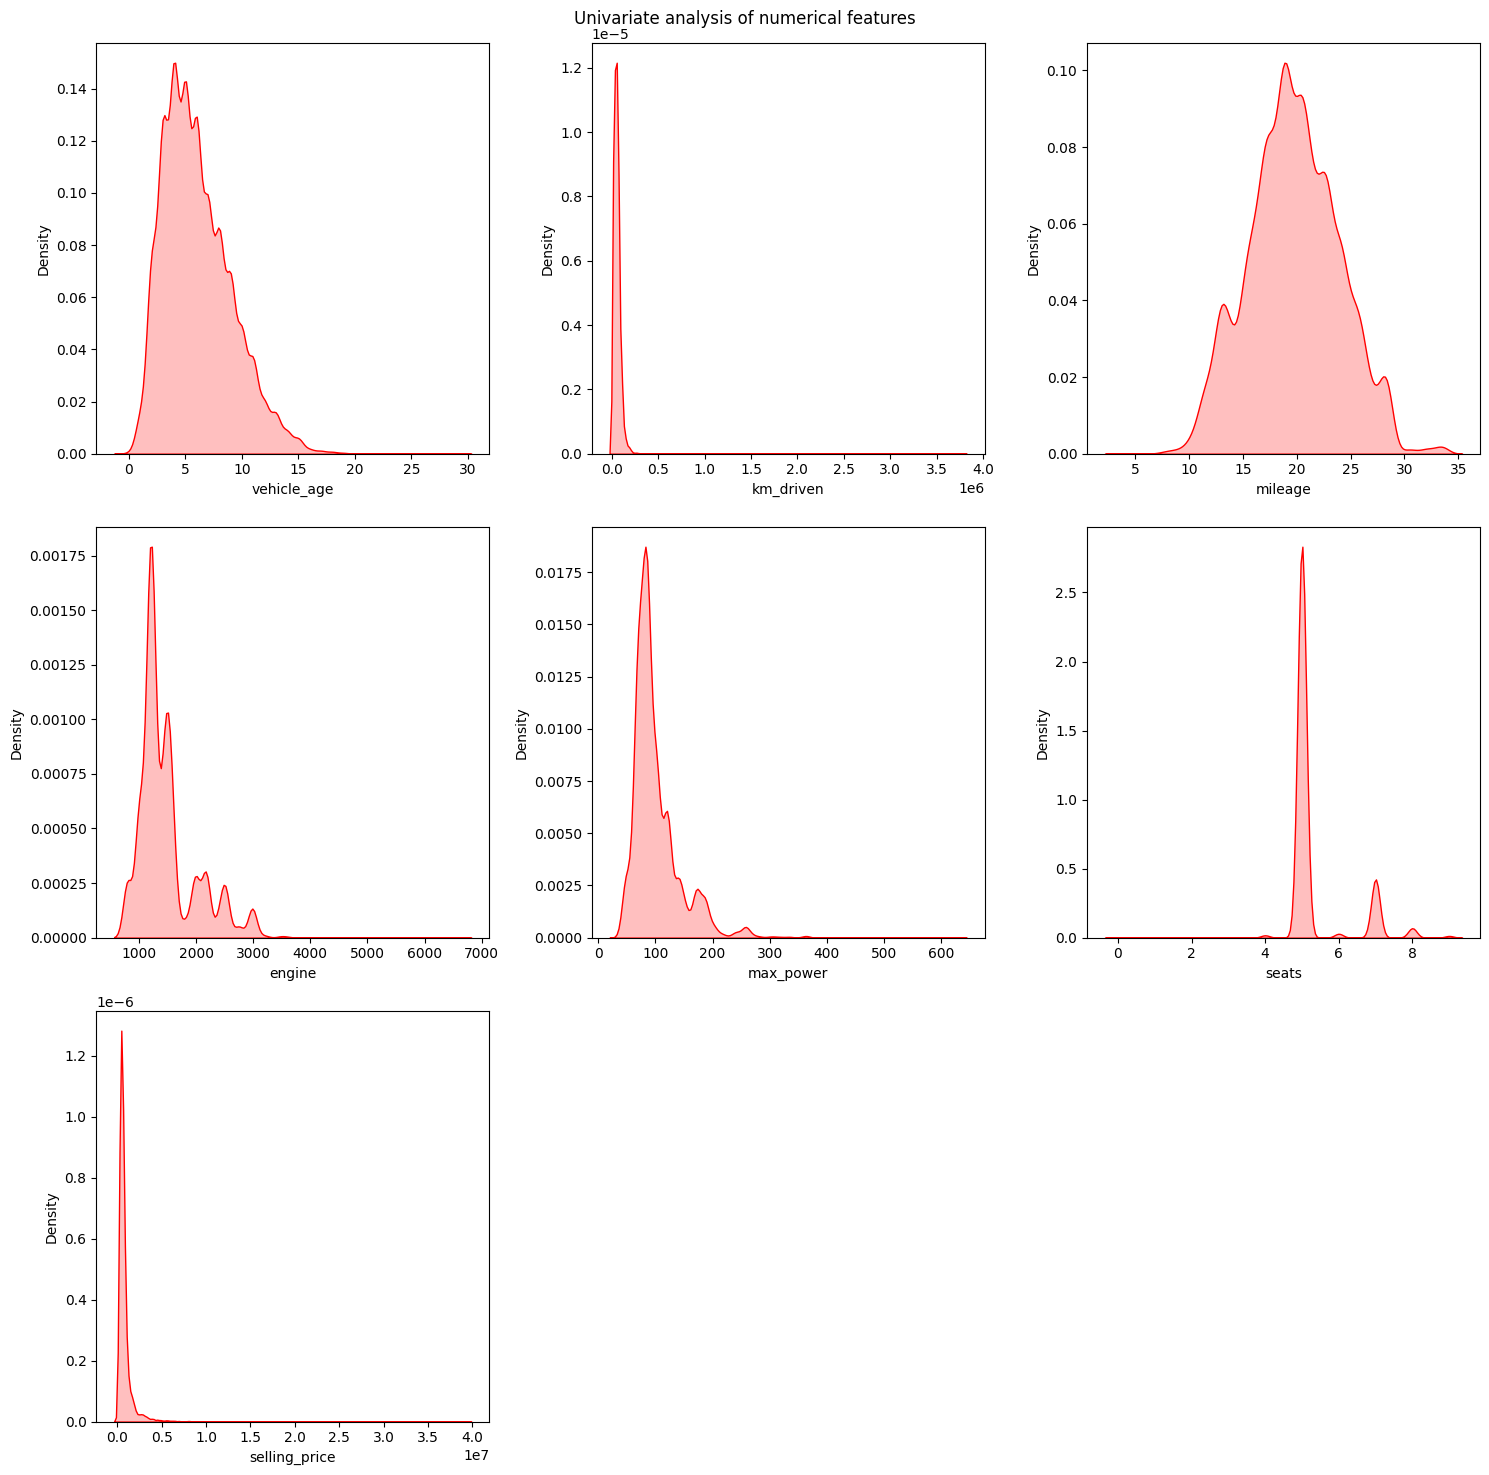

In [26]:
plt.figure(figsize=(15,15))
plt.suptitle("Univariate analysis of numerical features")

for i in range(len(numeric_features)):
    plt.subplot(3,3,i+1)
    sns.kdeplot(x= df[numeric_features[i]], color='r', shade =True)
    plt.xlabel(numeric_features[i])
    plt.tight_layout()
    

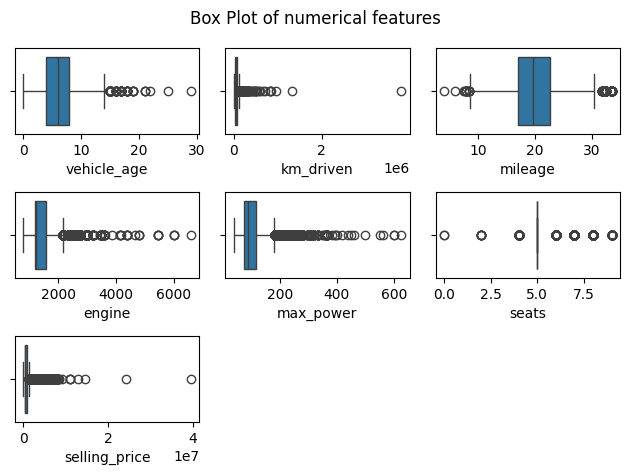

In [27]:
plt.suptitle("Box Plot of numerical features")

for i in range(len(numerical_features)):
    plt.subplot(3,3,i+1)
    sns.boxplot(x= df[numerical_features[i]])
    plt.xlabel(numerical_features[i])
    plt.tight_layout()

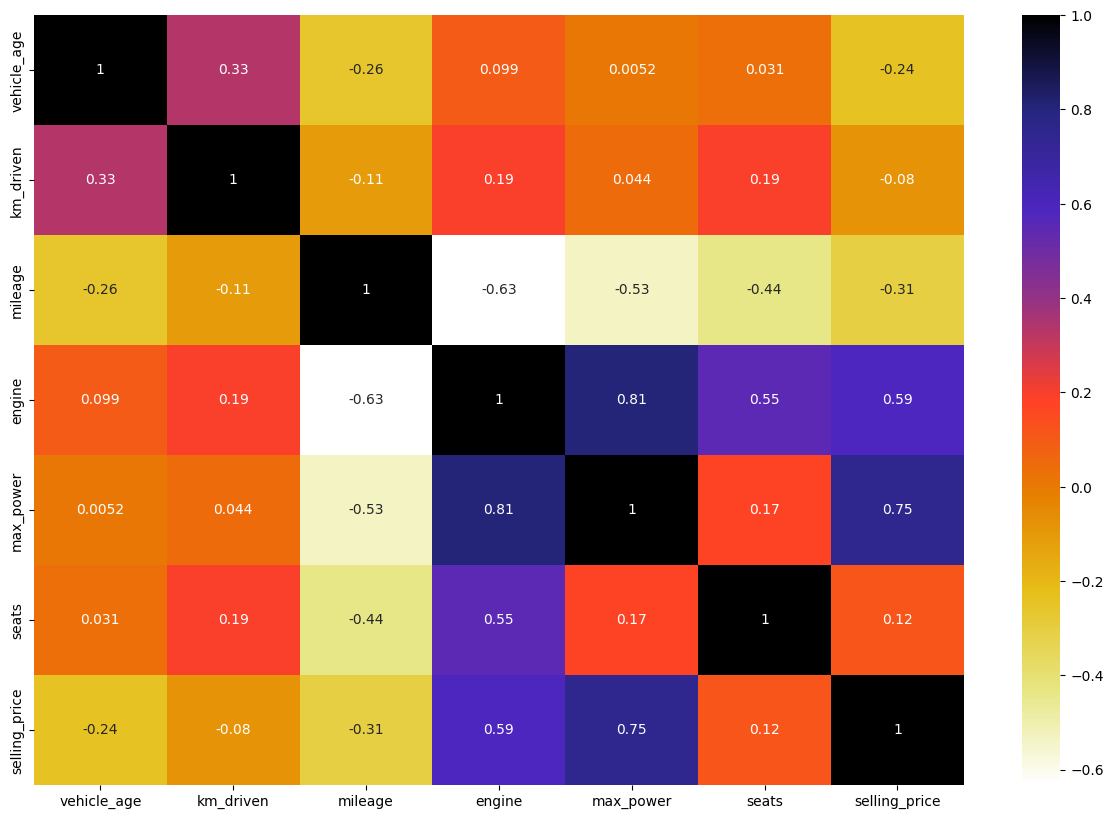

In [28]:
plt.figure(figsize = (15,10))
#sns.heatmap(df.corr(), cmap="CMRmap_r", annot=True)
sns.heatmap(df[numerical_features].corr(), cmap="CMRmap_r",annot=True)
plt.show()

In [29]:
for col in categorical_features:
    print(df[col].value_counts(normalize=True)*100)
    print()
    print("----"*50)
    print()

car_name
Hyundai i20              5.878918
Maruti Swift Dzire       5.775096
Maruti Swift             5.067809
Maruti Alto              5.048342
Honda City               4.912076
                           ...   
Maserati Quattroporte    0.006489
Maserati Ghibli          0.006489
Mercedes-AMG C           0.006489
Rolls-Royce Ghost        0.006489
Ferrari GTC4Lusso        0.006489
Name: proportion, Length: 121, dtype: float64

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

brand
Maruti           32.392447
Hyundai          19.349815
Honda             9.635974
Mahindra          6.560249
Toyota            5.145675
Ford              5.126209
Volkswagen        4.023100
Renault           3.478035
BMW               2.848615
Tata              2.790215
Mercedes-Benz     2.186750
Skoda             2.167283
Audi              1.245863
Datsun     

In [30]:
df['selling_price']

0          235000
1          185000
2          150000
3          172000
4          125000
           ...   
15406     8100000
15407    24200000
15408     5200000
15409    39500000
15410    14500000
Name: selling_price, Length: 15411, dtype: int64

(0.0, 3000000.0)

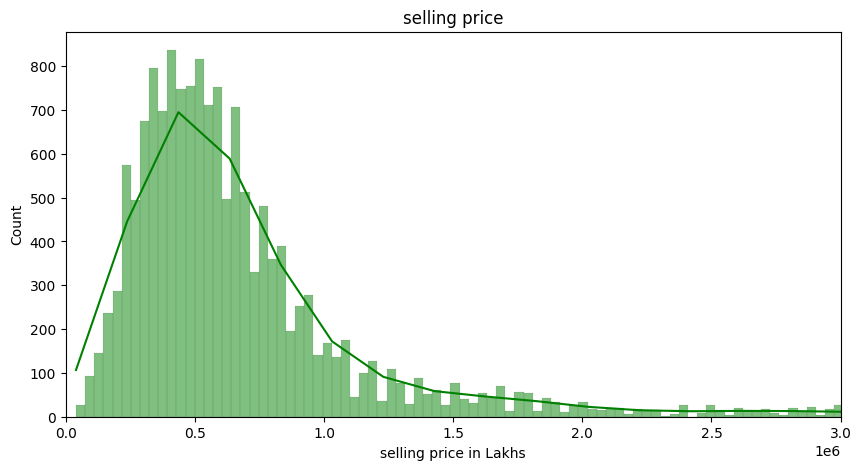

In [31]:
plt.figure(figsize=(10,5))
sns.histplot(df["selling_price"], kde=True,color='g')
plt.title("selling price")
plt.xlabel('selling price in Lakhs')
plt.xlim(0,3000000)

In [32]:
# most cars sold on dataset
df["car_name"].value_counts()

car_name
Hyundai i20              906
Maruti Swift Dzire       890
Maruti Swift             781
Maruti Alto              778
Honda City               757
                        ... 
Maserati Quattroporte      1
Maserati Ghibli            1
Mercedes-AMG C             1
Rolls-Royce Ghost          1
Ferrari GTC4Lusso          1
Name: count, Length: 121, dtype: int64

In [33]:
# top 10 most cars sold on cars_dataset
df["car_name"].value_counts()[0:10]

car_name
Hyundai i20           906
Maruti Swift Dzire    890
Maruti Swift          781
Maruti Alto           778
Honda City            757
Maruti Wagon R        717
Hyundai Grand         580
Toyota Innova         545
Hyundai Verna         492
Hyundai i10           410
Name: count, dtype: int64

In [34]:
df["car_name"].value_counts().head(10)

car_name
Hyundai i20           906
Maruti Swift Dzire    890
Maruti Swift          781
Maruti Alto           778
Honda City            757
Maruti Wagon R        717
Hyundai Grand         580
Toyota Innova         545
Hyundai Verna         492
Hyundai i10           410
Name: count, dtype: int64

In [35]:
df["car_name"].value_counts().index[0:10]

Index(['Hyundai i20', 'Maruti Swift Dzire', 'Maruti Swift', 'Maruti Alto',
       'Honda City', 'Maruti Wagon R', 'Hyundai Grand', 'Toyota Innova',
       'Hyundai Verna', 'Hyundai i10'],
      dtype='object', name='car_name')

In [36]:
df["car_name"].value_counts().head(10).index

Index(['Hyundai i20', 'Maruti Swift Dzire', 'Maruti Swift', 'Maruti Alto',
       'Honda City', 'Maruti Wagon R', 'Hyundai Grand', 'Toyota Innova',
       'Hyundai Verna', 'Hyundai i10'],
      dtype='object', name='car_name')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Hyundai i20'),
  Text(1, 0, 'Maruti Swift Dzire'),
  Text(2, 0, 'Maruti Swift'),
  Text(3, 0, 'Maruti Alto'),
  Text(4, 0, 'Honda City'),
  Text(5, 0, 'Maruti Wagon R'),
  Text(6, 0, 'Hyundai Grand'),
  Text(7, 0, 'Toyota Innova'),
  Text(8, 0, 'Hyundai Verna'),
  Text(9, 0, 'Hyundai i10')])

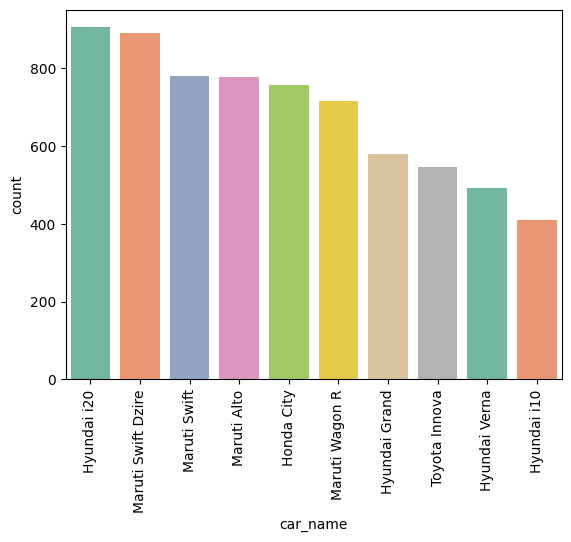

In [37]:
sns.countplot(x="car_name",palette="Set2", data = df, order=df["car_name"].value_counts().head(10).index)
plt.xticks(rotation = 90)

In [38]:
# mean of i20 to find one car price
i20 = df[df["car_name"] == 'Hyundai i20']
selling_price_i20 = i20.selling_price.mean()
print("the average mean price of i20 is", selling_price_i20)
av_share_i20 = df["car_name"].value_counts(normalize=True)*100
print("the average share of hyundai i20 is", round(av_share_i20[0],2), "%")

the average mean price of i20 is 543603.7527593819
the average share of hyundai i20 is 5.88 %


In [39]:
df.brand.value_counts().head(10)

brand
Maruti        4992
Hyundai       2982
Honda         1485
Mahindra      1011
Toyota         793
Ford           790
Volkswagen     620
Renault        536
BMW            439
Tata           430
Name: count, dtype: int64

<Axes: xlabel='brand', ylabel='count'>

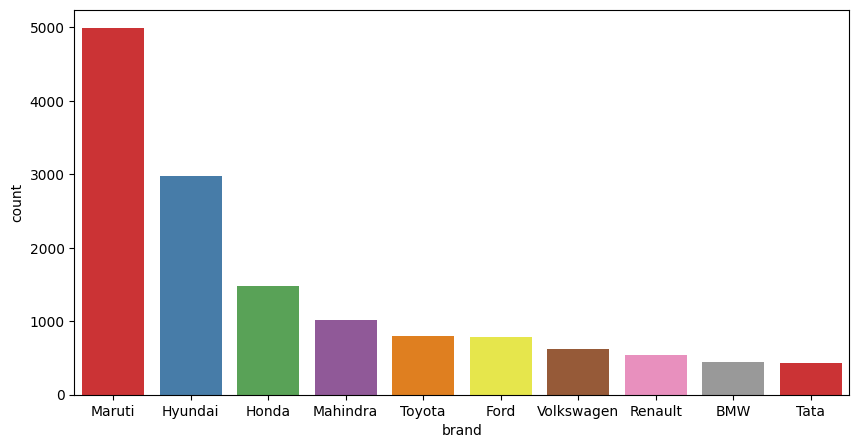

In [40]:
plt.figure(figsize=(10,5))
sns.countplot(x = "brand", data = df, palette="Set1",order=df["brand"].value_counts().head(10).index)

In [41]:
# average mean of maruti brand

maruti = df[df['brand'] == "Maruti"]
maruti["selling_price"].mean()



np.float64(487089.3179086539)

In [42]:
# Top most costlier brand on 
max_brand_price= df.groupby('brand').selling_price.max()
max_brand_name = df[df["selling_price"]==max_brand_price.max()]
max_brand_name['brand']

15409    Ferrari
Name: brand, dtype: object

In [43]:
# Top 10 most costlier brand on 
max_brand_price= df.groupby('brand').selling_price.max()
top_10_expensive_cars=max_brand_price.sort_values(ascending=False).head(10)
top_10_expensive_cars

brand
Ferrari          39500000
Rolls-Royce      24200000
Bentley          14500000
Mercedes-Benz    13000000
Porsche          11100000
Land Rover        9200000
BMW               8500000
Volvo             8195000
Lexus             8000000
Audi              6800000
Name: selling_price, dtype: int64

In [44]:
df[df["selling_price"]==max_brand_price.max()]['brand']

15409    Ferrari
Name: brand, dtype: object

In [45]:
max_brand_price= df.groupby('brand').selling_price.max()

In [46]:
m = max_brand_price.sort_values(ascending=False)[:10:]
m.index

Index(['Ferrari', 'Rolls-Royce', 'Bentley', 'Mercedes-Benz', 'Porsche',
       'Land Rover', 'BMW', 'Volvo', 'Lexus', 'Audi'],
      dtype='object', name='brand')

<Axes: xlabel='brand', ylabel='selling_price'>

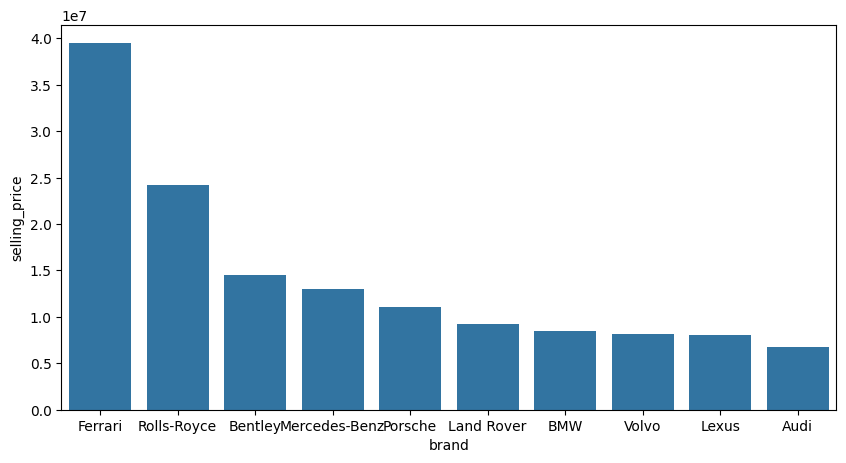

In [47]:
plt.figure(figsize=(10,5))
top_10 = top_10_expensive_cars.to_frame()
# print(top_10)
sns.barplot(x = top_10.index, y = top_10['selling_price'])

In [48]:
car = df.groupby('car_name').selling_price.max()
car = car.to_frame().sort_values('selling_price',ascending=False)[:10]
car

,selling_price
car_name,
Ferrari GTC4Lusso,39500000
Rolls-Royce Ghost,24200000
Bentley Continental,14500000
Mercedes-Benz S-Class,13000000
Porsche Cayenne,11100000
Land Rover Rover,9200000
BMW 7,8500000
BMW Z4,8250000
Volvo XC,8195000


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Ferrari GTC4Lusso'),
  Text(1, 0, 'Rolls-Royce Ghost'),
  Text(2, 0, 'Bentley Continental'),
  Text(3, 0, 'Mercedes-Benz S-Class'),
  Text(4, 0, 'Porsche Cayenne'),
  Text(5, 0, 'Land Rover Rover'),
  Text(6, 0, 'BMW 7'),
  Text(7, 0, 'BMW Z4'),
  Text(8, 0, 'Volvo XC'),
  Text(9, 0, 'BMW X5')])

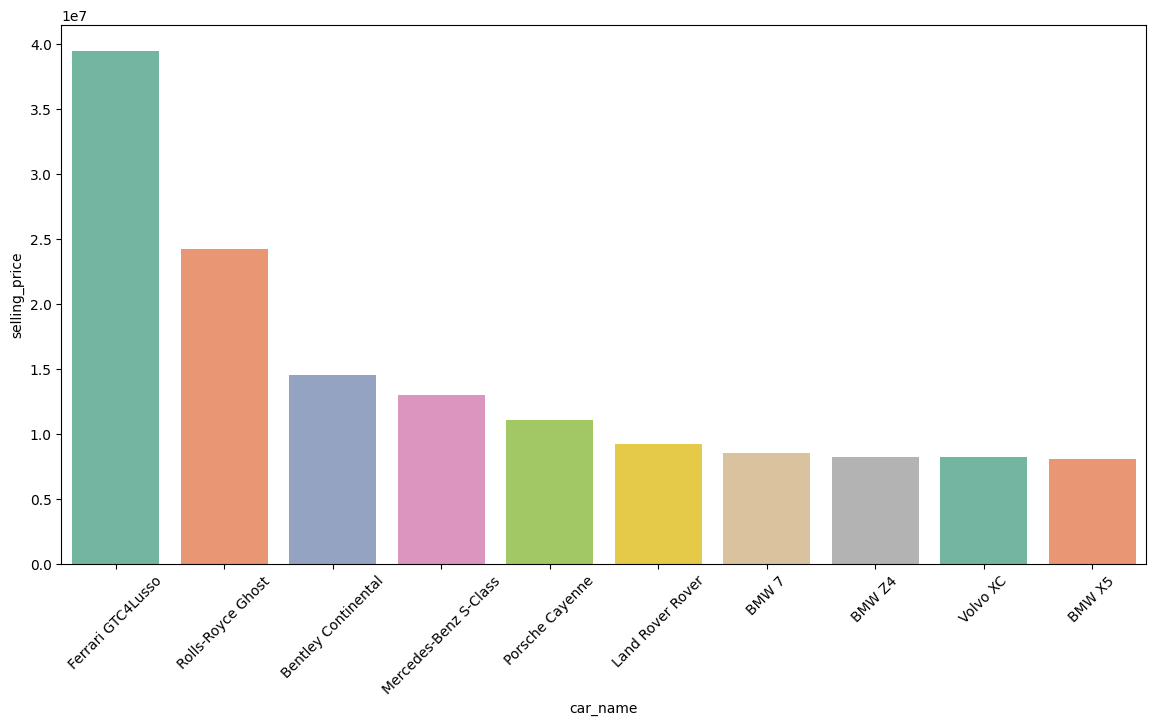

In [49]:
plt.figure(figsize=(14,7))

sns.barplot(x = car.index, y = car['selling_price'], palette="Set2")
plt.xticks(rotation=45)

<Axes: xlabel='vehicle_age', ylabel='km_driven'>

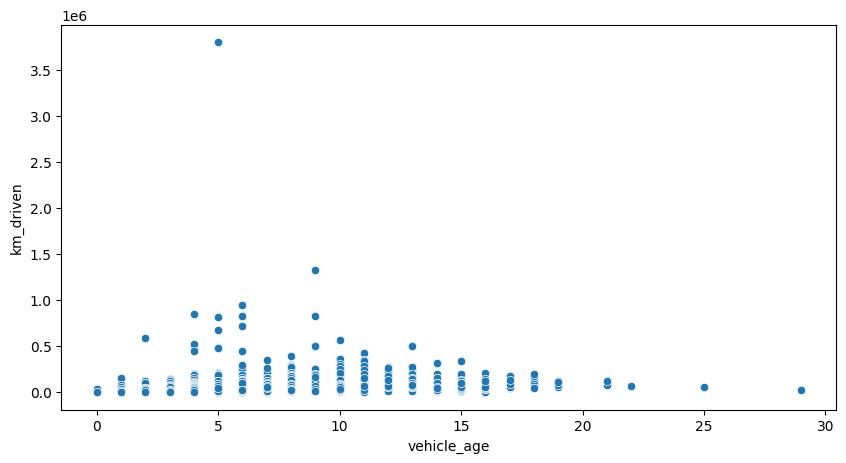

In [50]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=df['vehicle_age'], y=df['km_driven'])

In [51]:
max_km_driven= df.km_driven.max()
index = df[df["km_driven"]==max_km_driven.max()].index
index[0]
#df.drop(index[0], inplace=True)

np.int64(13314)

In [52]:
df[df["km_driven"]==max_km_driven]

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
13314,Mahindra XUV500,Mahindra,XUV500,5,3800000,Dealer,Diesel,Manual,16.0,2179,140.0,7,1225000


<Axes: xlabel='km_driven', ylabel='vehicle_age'>

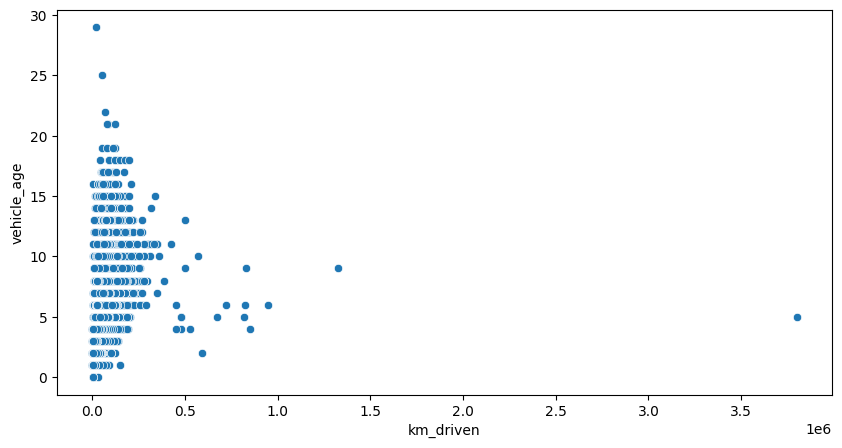

In [53]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=df['km_driven'],y=df['vehicle_age'])

In [54]:
# top 10 mileage based on brand on 
mileage=df.groupby('brand')['mileage'].mean().sort_values(ascending=False).head(15)
mileage.to_frame()

,mileage
brand,
Maruti,22.430980
Renault,22.099142
Datsun,21.215647
Lexus,20.846000
Ford,19.922620
Honda,19.908795
Maserati,19.820000
Tata,19.755279
Hyundai,19.588776


Text(0, 0.5, 'Mileage in kmpl')

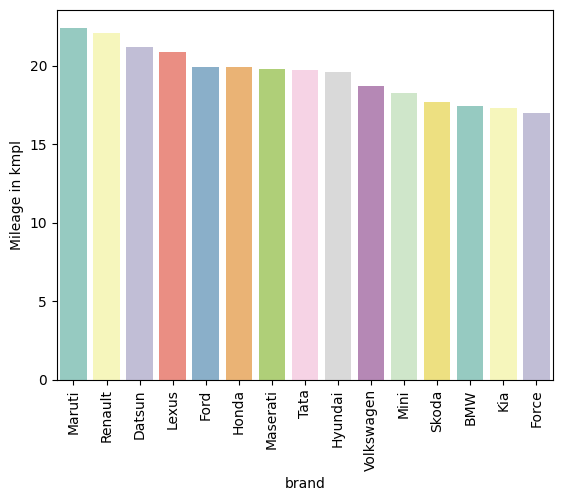

In [55]:
sns.barplot(x=mileage.index,y = mileage.values, palette='Set3')
plt.xticks(rotation= 90)
plt.ylabel('Mileage in kmpl')

In [56]:
# most milage car

mileage_car = df.groupby('car_name')['mileage'].mean().sort_values(ascending=False).head(10)
mileage_car.to_frame()

,mileage
car_name,
Tata Tiago,24.625103
Maruti Ciaz,24.289046
Maruti Vitara,24.231932
Renault KWID,24.037810
Maruti Celerio,23.703502
Maruti Dzire VXI,23.512941
Maruti Dzire ZXI,23.260000
Maruti Dzire LXI,23.260000
Ford Aspire,22.993846


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Tata Tiago'),
  Text(1, 0, 'Maruti Ciaz'),
  Text(2, 0, 'Maruti Vitara'),
  Text(3, 0, 'Renault KWID'),
  Text(4, 0, 'Maruti Celerio'),
  Text(5, 0, 'Maruti Dzire VXI'),
  Text(6, 0, 'Maruti Dzire ZXI'),
  Text(7, 0, 'Maruti Dzire LXI'),
  Text(8, 0, 'Ford Aspire'),
  Text(9, 0, 'Maruti Swift')])

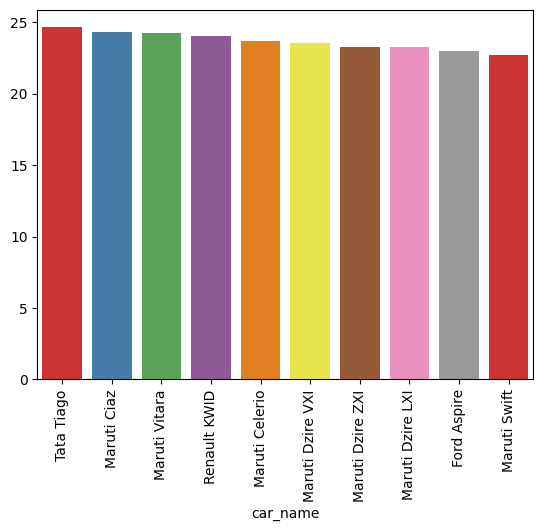

In [57]:
sns.barplot(x=mileage_car.index,y=mileage_car.values, palette='Set1')
plt.xticks(rotation= 90)

(-10000.0, 10000000.0)

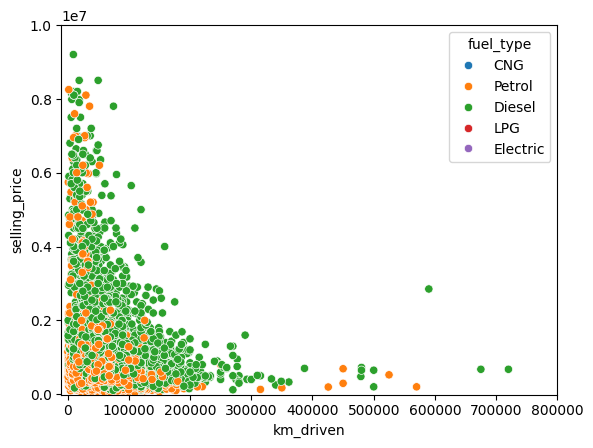

In [58]:
sns.scatterplot(x=df['km_driven'],y=df['selling_price'], data=df, hue="fuel_type")
plt.xlim(-10000,800000)
plt.ylim(-10000,10000000)

In [59]:
brand_price= df.groupby('brand').selling_price.mean().sort_values(ascending=False)
brand_price.to_frame()

,selling_price
brand,
Ferrari,3.950000e+07
Rolls-Royce,2.420000e+07
Bentley,9.266667e+06
Maserati,6.100000e+06
Porsche,5.161190e+06
Lexus,5.146500e+06
Mercedes-AMG,5.100000e+06
Land Rover,3.823902e+06
Volvo,3.729700e+06


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31],
 [Text(0, 0, 'Ferrari'),
  Text(1, 0, 'Rolls-Royce'),
  Text(2, 0, 'Bentley'),
  Text(3, 0, 'Maserati'),
  Text(4, 0, 'Porsche'),
  Text(5, 0, 'Lexus'),
  Text(6, 0, 'Mercedes-AMG'),
  Text(7, 0, 'Land Rover'),
  Text(8, 0, 'Volvo'),
  Text(9, 0, 'BMW'),
  Text(10, 0, 'Jaguar'),
  Text(11, 0, 'Mercedes-Benz'),
  Text(12, 0, 'Mini'),
  Text(13, 0, 'Audi'),
  Text(14, 0, 'ISUZU'),
  Text(15, 0, 'Jeep'),
  Text(16, 0, 'MG'),
  Text(17, 0, 'Kia'),
  Text(18, 0, 'Toyota'),
  Text(19, 0, 'Isuzu'),
  Text(20, 0, 'Nissan'),
  Text(21, 0, 'Mahindra'),
  Text(22, 0, 'Skoda'),
  Text(23, 0, 'Force'),
  Text(24, 0, 'Tata'),
  Text(25, 0, 'Ford'),
  Text(26, 0, 'Honda'),
  Text(27, 0, 'Hyundai'),
  Text(28, 0, 'Volkswagen'),
  Text(29, 0, 'Maruti'),
  Text(30, 0, 'Renault'),
  Text(31, 0, 'Datsun')])

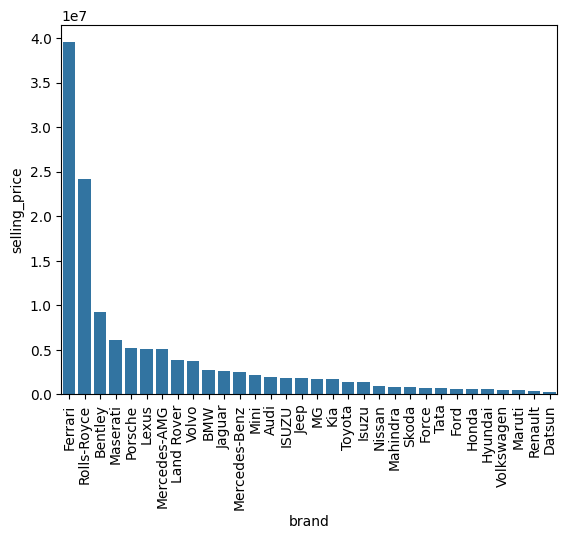

In [60]:
sns.barplot(brand_price)
plt.xticks(rotation=90)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31],
 [Text(0, 0, 'Maruti'),
  Text(1, 0, 'Datsun'),
  Text(2, 0, 'Renault'),
  Text(3, 0, 'Hyundai'),
  Text(4, 0, 'Mahindra'),
  Text(5, 0, 'Skoda'),
  Text(6, 0, 'Ford'),
  Text(7, 0, 'Tata'),
  Text(8, 0, 'Volkswagen'),
  Text(9, 0, 'Honda'),
  Text(10, 0, 'Force'),
  Text(11, 0, 'Toyota'),
  Text(12, 0, 'Mini'),
  Text(13, 0, 'Nissan'),
  Text(14, 0, 'Kia'),
  Text(15, 0, 'Audi'),
  Text(16, 0, 'Isuzu'),
  Text(17, 0, 'MG'),
  Text(18, 0, 'Land Rover'),
  Text(19, 0, 'BMW'),
  Text(20, 0, 'Mercedes-Benz'),
  Text(21, 0, 'Jeep'),
  Text(22, 0, 'Volvo'),
  Text(23, 0, 'ISUZU'),
  Text(24, 0, 'Jaguar'),
  Text(25, 0, 'Lexus'),
  Text(26, 0, 'Porsche'),
  Text(27, 0, 'Maserati'),
  Text(28, 0, 'Mercedes-AMG'),
  Text(29, 0, 'Bentley'),
  Text(30, 0, 'Rolls-Royce'),
  Text(31, 0, 'Ferrari')])

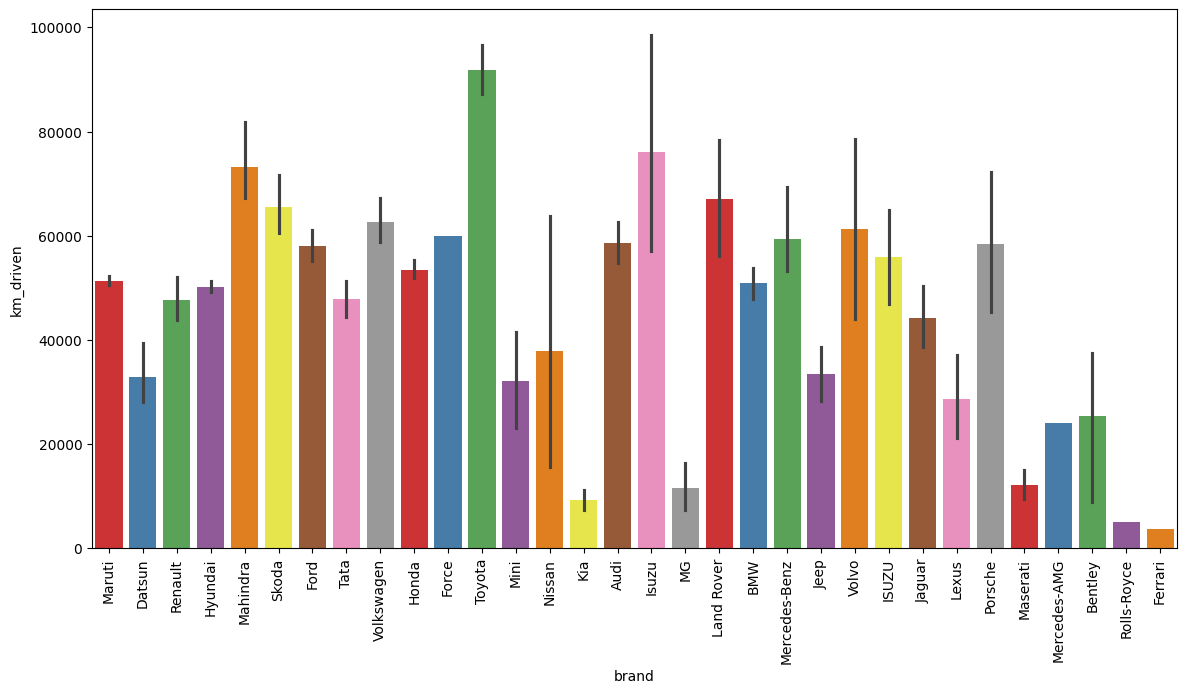

In [61]:
plt.figure(figsize=(14,7))
sns.barplot(x=df['brand'], y= df['km_driven'], palette="Set1")
plt.xticks(rotation=90)

In [62]:
# fuel type vs selling price
fuel = df.groupby('fuel_type')['selling_price'].median().sort_values(ascending=False)
fuel.to_frame()

,selling_price
fuel_type,
Electric,1857500.0
Diesel,700000.0
Petrol,460000.0
CNG,370000.0
LPG,182500.0


Text(0, 0.5, 'selling_price in Lakhs')

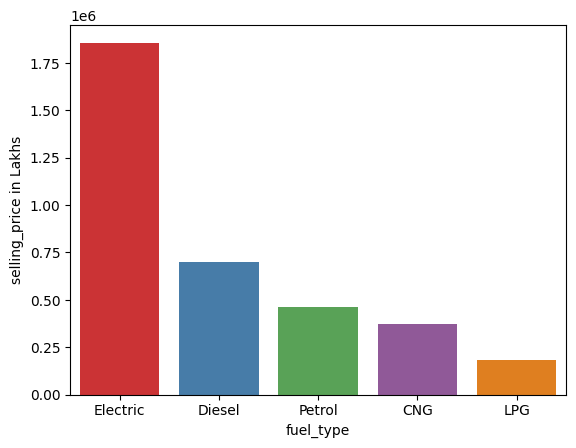

In [63]:
sns.barplot(x = fuel.index, y=fuel.values, palette="Set1")
plt.ylabel("selling_price in Lakhs")

<Axes: xlabel='fuel_type', ylabel='count'>

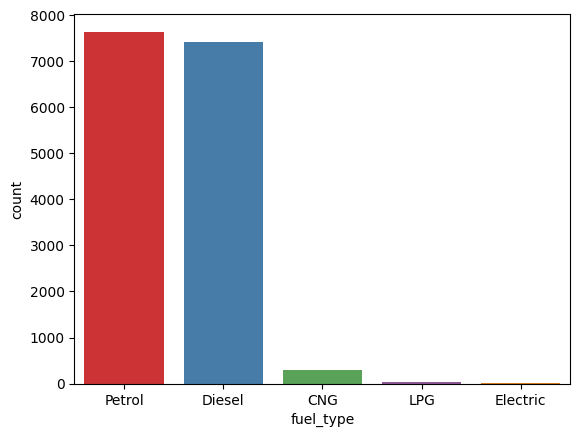

In [64]:
# most sold fuel type
sns.countplot(x=df['fuel_type'], palette='Set1', order=df['fuel_type'].value_counts().sort_values(ascending=False).index)

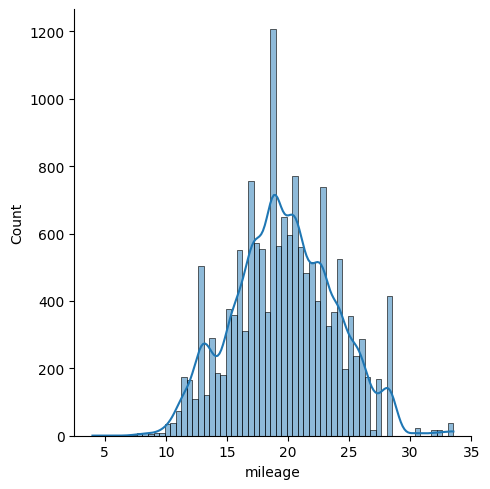

In [65]:
sns.displot(df["mileage"], kde=True)

In [66]:
# Fuel type vs Mileage
fuel_mileage = df.groupby('fuel_type')['mileage'].mean().sort_values(ascending=False)

fuel_mileage.to_frame()

,mileage
fuel_type,
CNG,25.814651
Diesel,20.060030
Electric,19.160000
Petrol,19.123045
LPG,17.836364


Text(0, 0.5, 'mileage')

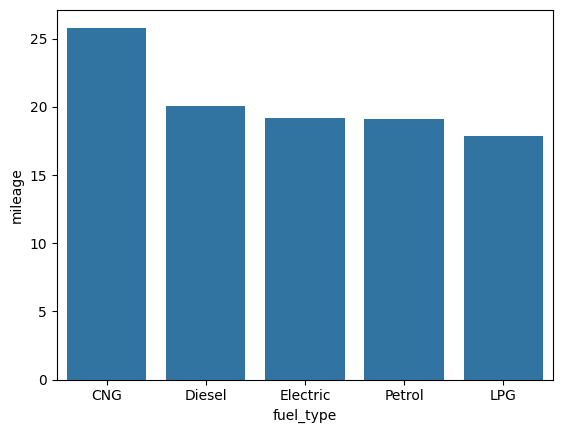

In [67]:
sns.barplot(x=fuel_mileage.index, y=fuel_mileage.values)
plt.ylabel("mileage")

<Axes: xlabel='fuel_type', ylabel='mileage'>

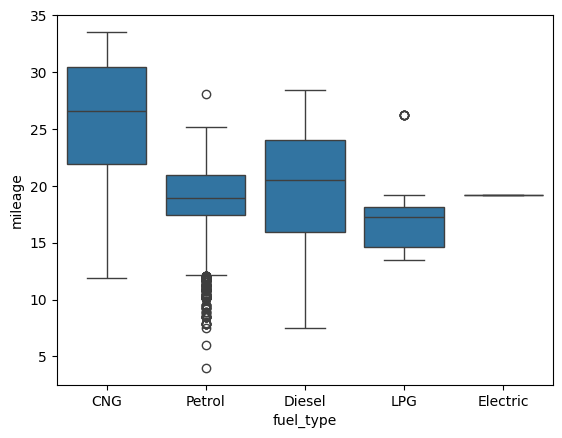

In [68]:
sns.boxplot(x= 'fuel_type', y='mileage', data = df)

(10.0, 22.0)

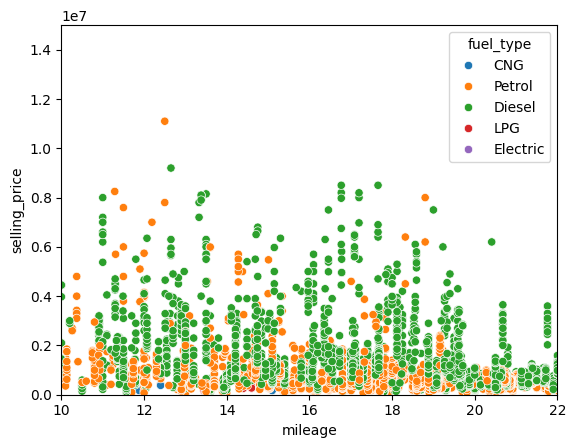

In [69]:
# mileage vs selling price
sns.scatterplot(x= 'mileage', y= 'selling_price', data=df,hue='fuel_type')
plt.ylim(0,15000000)
plt.xlim(10,22)

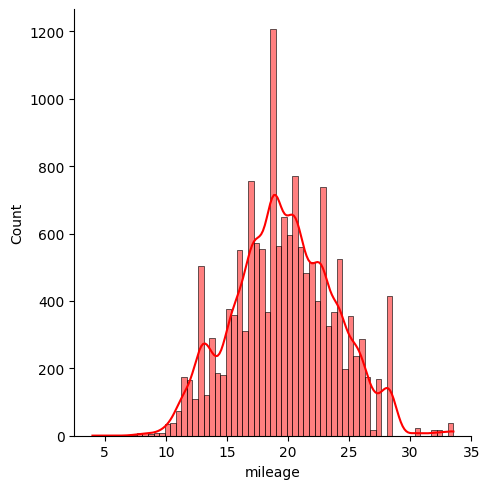

In [70]:
sns.displot(x= 'mileage',data=df, kde= True, color="red")

<Axes: xlabel='vehicle_age', ylabel='selling_price'>

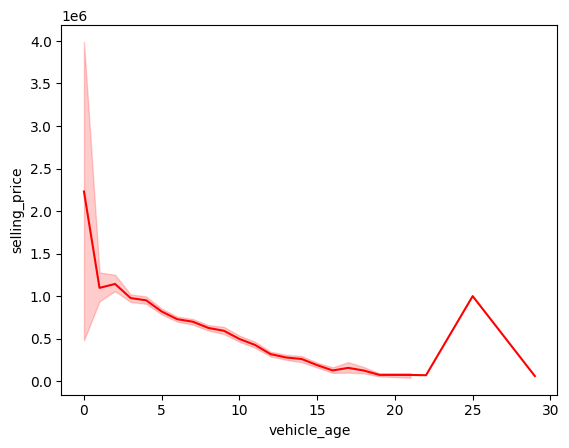

In [71]:
sns.lineplot(x= 'vehicle_age', y= 'selling_price', data=df, color= 'red')

In [72]:
vehicle_age =  df.groupby('vehicle_age')['mileage'].median().sort_values(ascending=False)
vehicle_age.to_frame().head()

,mileage
vehicle_age,
29,22.05
0,21.70
3,21.21
4,20.63
5,20.51


<Axes: xlabel='vehicle_age', ylabel='mileage'>

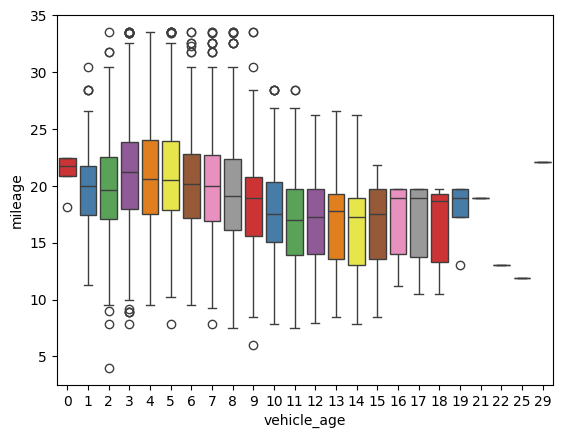

In [73]:
plt.subplots(figure=(14,7))
sns.boxplot(x=df['vehicle_age'], y=df['mileage'], palette='Set1')

<Axes: xlabel='transmission_type', ylabel='selling_price'>

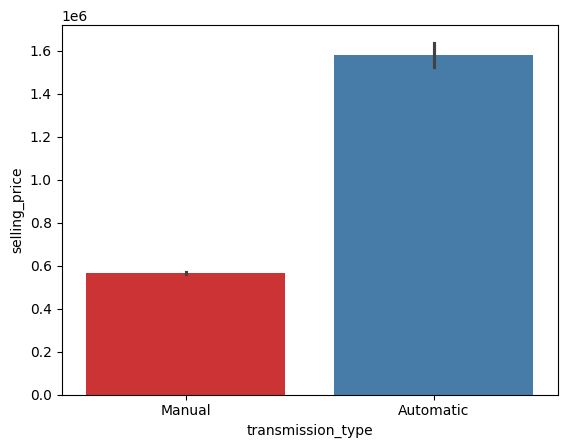

In [74]:
plt.subplots(figure=(14,7))
sns.barplot(x=df['transmission_type'], y=df['selling_price'], data=df, palette="Set1")

<Axes: xlabel='transmission_type', ylabel='mileage'>

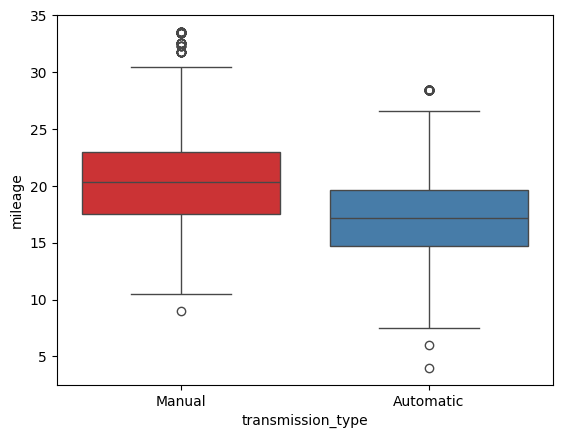

In [75]:
plt.subplots(figure=(14,7))
sns.boxplot(x=df['transmission_type'], y=df['mileage'], data=df, palette="Set1")

<Axes: xlabel='transmission_type', ylabel='count'>

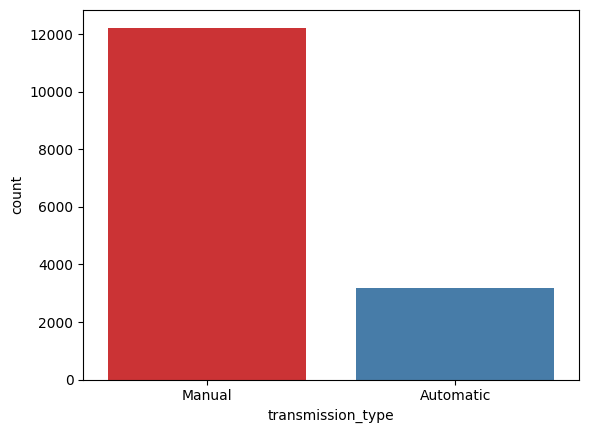

In [76]:
plt.subplots(figure=(14,7))
sns.countplot(x='transmission_type', data=df, palette="Set1")

<Axes: xlabel='seller_type', ylabel='count'>

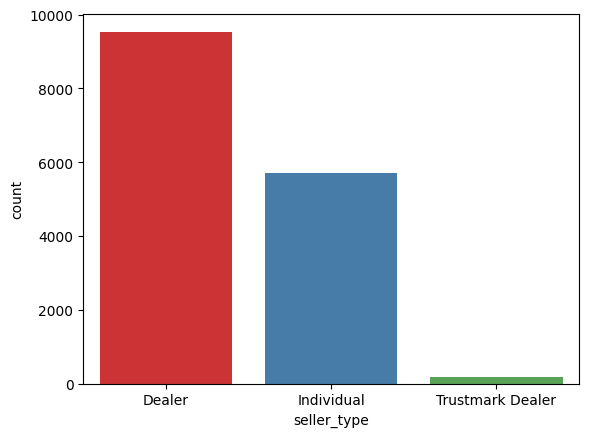

In [77]:
plt.subplots(figure=(14,7))
sns.countplot(x='seller_type', data=df, palette="Set1")


In [78]:
dealer = df.groupby('seller_type')['selling_price'].median().sort_values(ascending=False)
dealer.to_frame()

,selling_price
seller_type,
Dealer,591000.0
Trustmark Dealer,540000.0
Individual,507000.0


Text(0, 0.5, 'Median Selling Price')

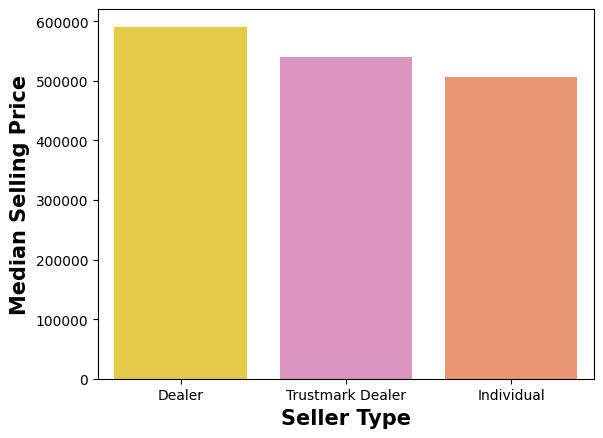

In [79]:
plt.subplots(figure=(14,7))
sns.barplot(x=dealer.index, y =dealer.values,palette="Set2_r")
plt.xlabel("Seller Type", weight="bold", fontsize= 15)
plt.ylabel("Median Selling Price", weight="bold", fontsize= 15)

#### Observation
- dealers are giving more price valuation than others.


# Final report


- The datatypes and columns names were right and there was 15411 rows and 13 columns.
- The selling price column is the target to predict i.e. Regression Problem
- There are outliers in the km_driven, engine, selling_price and max power
- Dealers are the highest sellers of the used cars.
- Skewness were found in few columns will be checked after handling the oultiers.
- vehicle age have negative effect on price.
- Manual cars are mostly sold and automatic cars has higher selling average than manual cars.
- Petrol is the most preffered vehicle of the fuel in used cars dataset, followed by diesel and LPG.

# Feature engineering

# Checking the Outliers


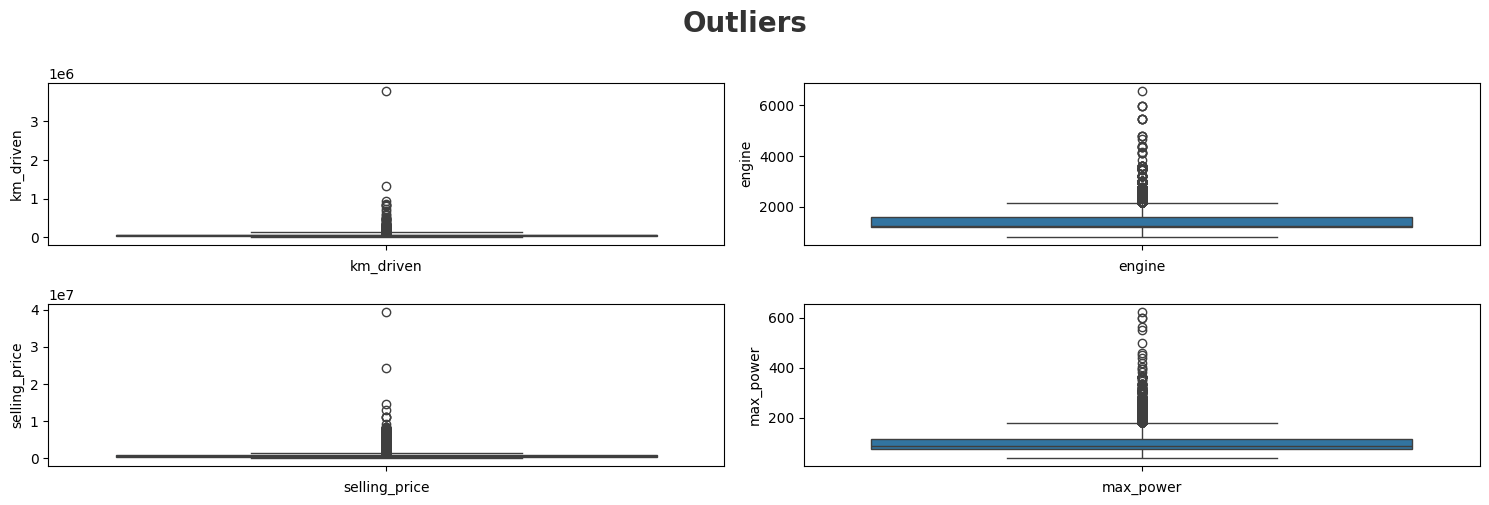

In [80]:
plt.figure(figsize=(15,5))
plt.suptitle("Outliers", fontsize=20, fontweight="bold",alpha=0.8,y=1)

outliers= ['km_driven', 'engine', 'selling_price','max_power']
# outliers= numeric_features
for i in range(len(outliers)):
    #plt.subplot(4,2,i+1)
    plt.subplot(2,2,i+1)
    sns.boxplot(df[outliers[i]])
    plt.xlabel(outliers[i])
    plt.tight_layout()

# Outlier detection and removal using IQR

In [81]:
total_number_of_outliers_detected = []
outliers= ['km_driven', 'engine', 'selling_price','max_power']

def outlier_detection_and_removal(df1, col_name):

  print("-------------------------------------------------------------------------------\n")
  print(col_name)
  print()
  print()
  Q1 = df1[col_name].quantile(0.25)
  Q3 = df1[col_name].quantile(0.75)

  print(f"Q1={Q1}, Q3={Q3}")

  IQR = Q3 - Q1
  print(f"IQR={IQR}")

  lower_limit = Q1 - 1.5*IQR
  upper_limit = Q3 + 1.5*IQR
  print(f"lower_limit= {lower_limit}, upper_limit = {upper_limit}")

  outlier_detected = df1[(df1[col_name]<lower_limit) | (df1[col_name]>upper_limit)]
  total_number_of_outliers_detected.append(len(outlier_detected))
  #print(outlier_detected)

  df1 = df1[(df1[col_name]>=lower_limit) & (df1[col_name]<=upper_limit)] # outliers removed from each column
  return df1
  #print(df1)

df1 = df.copy()
for i in outliers:

  df1 = outlier_detection_and_removal(df1, i)
  print(df1)

print(total_number_of_outliers_detected,": total outliers=>",sum(total_number_of_outliers_detected))



-------------------------------------------------------------------------------

km_driven


Q1=30000.0, Q3=70000.0
IQR=40000.0
lower_limit= -30000.0, upper_limit = 130000.0
                  car_name        brand        model  vehicle_age  km_driven  \
0              Maruti Alto       Maruti         Alto            9      53800   
1              Maruti Alto       Maruti         Alto           11      11000   
2              Maruti Alto       Maruti         Alto           11      80000   
3              Maruti Alto       Maruti         Alto           10      57000   
4              Maruti Alto       Maruti         Alto           11      72000   
...                    ...          ...          ...          ...        ...   
15406  Bentley Continental      Bentley  Continental           10      30000   
15407    Rolls-Royce Ghost  Rolls-Royce        Ghost            4       5000   
15408  Bentley Continental      Bentley  Continental            9      37500   
15409    Ferrari GTC4Lusso

In [82]:
df1.to_csv("cleaned_data.csv", index=False)

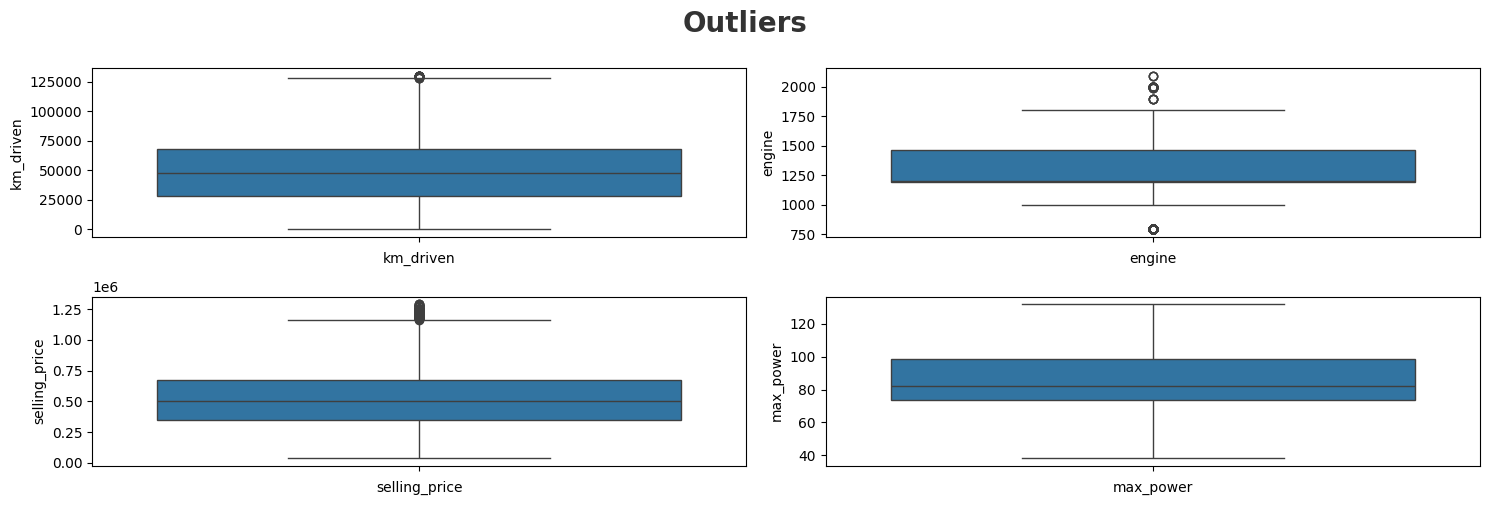

In [83]:
plt.figure(figsize=(15,5))
plt.suptitle("Outliers", fontsize=20, fontweight="bold",alpha=0.8,y=1)

outliers= ['km_driven', 'engine', 'selling_price','max_power']
# outliers= numeric_features
for i in range(len(outliers)):
    #plt.subplot(4,2,i+1)
    plt.subplot(2,2,i+1)
    sns.boxplot(df1[outliers[i]])
    plt.xlabel(outliers[i])
    plt.tight_layout()

In [84]:
df.head()

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,53800,Dealer,CNG,Manual,26.83,796,38.4,5,235000
1,Maruti Alto,Maruti,Alto,11,11000,Dealer,CNG,Manual,26.83,796,38.4,5,185000
2,Maruti Alto,Maruti,Alto,11,80000,Dealer,CNG,Manual,26.83,796,38.4,5,150000
3,Maruti Alto,Maruti,Alto,10,57000,Dealer,CNG,Manual,26.83,796,38.4,5,172000
4,Maruti Alto,Maruti,Alto,11,72000,Individual,CNG,Manual,26.83,796,38.4,5,125000


In [85]:
df_model = pd.read_csv("cleaned_data.csv")


In [86]:
df_model =  df.copy() # raw data
df_model

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,53800,Dealer,CNG,Manual,26.83,796,38.4,5,235000
1,Maruti Alto,Maruti,Alto,11,11000,Dealer,CNG,Manual,26.83,796,38.4,5,185000
2,Maruti Alto,Maruti,Alto,11,80000,Dealer,CNG,Manual,26.83,796,38.4,5,150000
3,Maruti Alto,Maruti,Alto,10,57000,Dealer,CNG,Manual,26.83,796,38.4,5,172000
4,Maruti Alto,Maruti,Alto,11,72000,Individual,CNG,Manual,26.83,796,38.4,5,125000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15406,Bentley Continental,Bentley,Continental,10,30000,Dealer,Petrol,Automatic,8.60,5998,552.0,4,8100000
15407,Rolls-Royce Ghost,Rolls-Royce,Ghost,4,5000,Individual,Petrol,Automatic,10.20,6592,563.0,4,24200000
15408,Bentley Continental,Bentley,Continental,9,37500,Dealer,Petrol,Automatic,6.00,5998,600.0,5,5200000
15409,Ferrari GTC4Lusso,Ferrari,GTC4Lusso,2,3800,Dealer,Petrol,Automatic,4.00,3855,601.0,4,39500000


In [87]:
df_model.drop(labels=['car_name', 'brand', 'model'], axis=1, inplace=True)

In [88]:
df_model

,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,9,53800,Dealer,CNG,Manual,26.83,796,38.4,5,235000
1,11,11000,Dealer,CNG,Manual,26.83,796,38.4,5,185000
2,11,80000,Dealer,CNG,Manual,26.83,796,38.4,5,150000
3,10,57000,Dealer,CNG,Manual,26.83,796,38.4,5,172000
4,11,72000,Individual,CNG,Manual,26.83,796,38.4,5,125000
...,...,...,...,...,...,...,...,...,...,...
15406,10,30000,Dealer,Petrol,Automatic,8.60,5998,552.0,4,8100000
15407,4,5000,Individual,Petrol,Automatic,10.20,6592,563.0,4,24200000
15408,9,37500,Dealer,Petrol,Automatic,6.00,5998,600.0,5,5200000
15409,2,3800,Dealer,Petrol,Automatic,4.00,3855,601.0,4,39500000


In [89]:
df_model.dtypes

vehicle_age            int64
km_driven              int64
seller_type           object
fuel_type             object
transmission_type     object
mileage              float64
engine                 int64
max_power            float64
seats                  int64
selling_price          int64
dtype: object

In [90]:
df_model = pd.get_dummies(df_model, dtype='float')

In [91]:
df_model

,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,fuel_type_CNG,fuel_type_Diesel,fuel_type_Electric,fuel_type_LPG,fuel_type_Petrol,transmission_type_Automatic,transmission_type_Manual
0,9,53800,26.83,796,38.4,5,235000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,11,11000,26.83,796,38.4,5,185000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,11,80000,26.83,796,38.4,5,150000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,10,57000,26.83,796,38.4,5,172000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,11,72000,26.83,796,38.4,5,125000,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15406,10,30000,8.60,5998,552.0,4,8100000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
15407,4,5000,10.20,6592,563.0,4,24200000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
15408,9,37500,6.00,5998,600.0,5,5200000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
15409,2,3800,4.00,3855,601.0,4,39500000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [92]:
df_model.dtypes

vehicle_age                       int64
km_driven                         int64
mileage                         float64
engine                            int64
max_power                       float64
seats                             int64
selling_price                     int64
seller_type_Dealer              float64
seller_type_Individual          float64
seller_type_Trustmark Dealer    float64
fuel_type_CNG                   float64
fuel_type_Diesel                float64
fuel_type_Electric              float64
fuel_type_LPG                   float64
fuel_type_Petrol                float64
transmission_type_Automatic     float64
transmission_type_Manual        float64
dtype: object

# creating Feature Matrix(independent Variable) & Target variable (dependent Variable)

In [93]:
X = df_model.drop('selling_price', axis= 1) # independent variable
X

,vehicle_age,km_driven,mileage,engine,max_power,seats,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,fuel_type_CNG,fuel_type_Diesel,fuel_type_Electric,fuel_type_LPG,fuel_type_Petrol,transmission_type_Automatic,transmission_type_Manual
0,9,53800,26.83,796,38.4,5,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,11,11000,26.83,796,38.4,5,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,11,80000,26.83,796,38.4,5,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,10,57000,26.83,796,38.4,5,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,11,72000,26.83,796,38.4,5,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15406,10,30000,8.60,5998,552.0,4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
15407,4,5000,10.20,6592,563.0,4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
15408,9,37500,6.00,5998,600.0,5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
15409,2,3800,4.00,3855,601.0,4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [94]:
y = df_model['selling_price'] # target variable or dependent variable
y

0          235000
1          185000
2          150000
3          172000
4          125000
           ...   
15406     8100000
15407    24200000
15408     5200000
15409    39500000
15410    14500000
Name: selling_price, Length: 15411, dtype: int64

# checking important features

In [95]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [96]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X, y)

ExtraTreesRegressor()

In [97]:
print("checking for feature importance")
print("-"*50)
print(model.feature_importances_)

checking for feature importance
--------------------------------------------------
[1.67032147e-01 5.28061167e-02 6.91482695e-02 1.29167704e-01
 3.76532398e-01 1.45314431e-02 4.05806915e-03 3.86327674e-03
 2.30233136e-05 4.48341926e-05 6.65062765e-03 1.21659390e-05
 1.79503623e-06 2.41979705e-02 7.05642432e-02 8.13659148e-02]


# visualisation for feature importance

<Axes: >

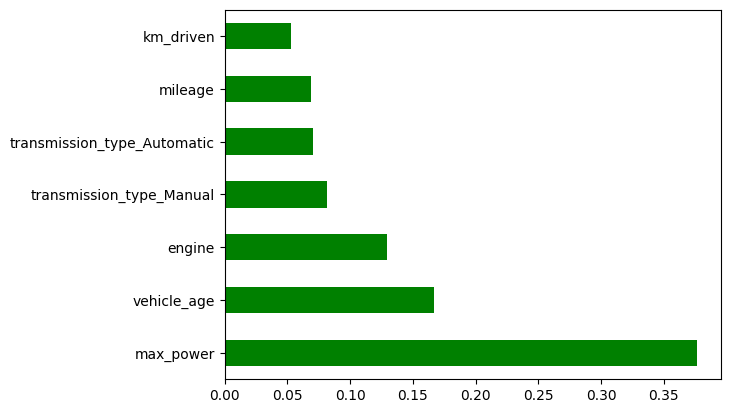

In [98]:

imp_features = pd.Series(model.feature_importances_, index = X.columns)
imp_features.nlargest(7).plot(kind='barh', color='g')

# Model Building and Evaluation



In [99]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

# importing important libraries for Model Building

In [100]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.metrics import mean_squared_error, explained_variance_score, r2_score

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [102]:
models = [LinearRegression, SVR, DecisionTreeRegressor, RandomForestRegressor,Ridge, Lasso]

mse=[]
rmse = []
evs =[]
r_square_score = []


for model in models:
    regressor = model().fit(X_train, y_train)
    pred = regressor.predict(X_test)
    print(pred)
    mse.append(mean_squared_error(y_true=y_test, y_pred=pred))
    rmse.append(np.sqrt(mean_squared_error(y_true=y_test, y_pred=pred)))
    evs.append(explained_variance_score(y_true=y_test, y_pred=pred))
    r_square_score.append(r2_score(y_true=y_test, y_pred=pred))
               

[ 884716.20428619 1760824.10293288  571597.86296512 ...  405436.14634288
 1098733.02557798  803665.22646964]
[552307.89427711 552899.27708372 552689.06439103 ... 552879.63344747
 552167.89793195 552879.80763273]
[ 499000. 2100000.  625000. ...  380000.  527000.  660000.]
[ 487648.33333333 2064300.          628275.         ...  379120.
  518940.          631489.66666667]
[ 884841.3326179  1760794.95518445  571613.90610464 ...  405390.77906841
 1098768.57398501  803624.77853793]
[ 884710.87511012 1760821.93924926  571597.64784176 ...  405434.40495543
 1098737.99332338  803665.05383533]


# creating DataFrame for model camparison

In [103]:
ML_model_df = pd.DataFrame({"Model":['Linear Regression', 'Support vector Regression', 'Decision Tree Regressor',\
                                      'Random Forest Regressor', 'Ridge', 'Lasso'],
                                      'Mean Squarred Error':mse,
                                      'Root mean squared error': rmse,
                                      "Explained variance Error": evs,
                                      "R-Squared Score(Accuracy)": r_square_score})

ML_model_df.set_index("Model", inplace=True)
ML_model_df

,Mean Squarred Error,Root mean squared error,Explained variance Error,R-Squared Score(Accuracy)
Model,,,,
Linear Regression,2.383140e+11,488174.134274,0.690981,0.690924
Support vector Regression,8.271451e+11,909475.194416,0.000104,-0.072747
Decision Tree Regressor,1.328255e+11,364452.328048,0.827796,0.827735
Random Forest Regressor,6.005234e+10,245055.796384,0.922142,0.922117
Ridge,2.383144e+11,488174.522714,0.690980,0.690924
Lasso,2.383136e+11,488173.722276,0.690981,0.690925


# Generating Pickle file - Saving Trained Model


In [104]:
import pickle

saved_models=[]

for model_class in models:
    model = model_class()
    regressor = model.fit(X_train, y_train)

    # Save the trained model to a pickle file
    model_filename = f"{model_class.__name__}_model.pkl"

    with open(model_filename, "wb") as model_file:
        pickle.dump(regressor, model_file)

    saved_models.append(model_filename)

In [105]:
val = [5,3800000,16.00,2179,140.00,7,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0]

In [106]:
val=[11,43000,19.70,796,46.30,5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0]
#val= [6,10000,20.85,1197,83.14,5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0]

In [107]:
saved_models

['LinearRegression_model.pkl',
 'SVR_model.pkl',
 'DecisionTreeRegressor_model.pkl',
 'RandomForestRegressor_model.pkl',
 'Ridge_model.pkl',
 'Lasso_model.pkl']

In [108]:
import pickle

with open('RandomForestRegressor_model.pkl', 'rb') as f:
    data = pickle.load(f)

In [109]:
data

RandomForestRegressor()

In [110]:
data.predict([val])

array([170833.33333333])

In [111]:
X_test

,vehicle_age,km_driven,mileage,engine,max_power,seats,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,fuel_type_CNG,fuel_type_Diesel,fuel_type_Electric,fuel_type_LPG,fuel_type_Petrol,transmission_type_Automatic,transmission_type_Manual
12480,8,60000,18.88,999,123.37,5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
13597,2,12500,13.68,2393,147.80,7,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
5604,4,33000,18.60,1197,81.83,5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2389,11,80875,18.90,998,67.10,5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
9214,2,13400,19.00,1194,94.68,5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1476,4,51000,20.51,998,67.00,5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
286,7,38000,22.74,796,47.30,5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1303,4,15000,23.01,999,67.00,5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
12852,7,71000,22.32,1582,126.32,5,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [112]:
y_test

12480     610000
13597    1750000
5604      695000
2389      250000
9214      721000
          ...   
1476      450000
286       265000
1303      330000
12852     495000
6106      670000
Name: selling_price, Length: 1542, dtype: int64

In [113]:
val =[2,37095,24.30,1248,88.50,5,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0]
data.predict([val])

array([884503.33333333])

In [114]:
val = [8,50000,25.80,1498,98.60,5,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0]
data.predict([val])

array([346379.28571429])

In [115]:
data.score(X_train, y_train)

0.9808641524000875

In [116]:
data.score(X_test, y_test)

0.9187017875413194